# <font color='CadetBlue'> **ПРАКТИКУМ ПО ПРОГРАММИРОВАНИЮ (1 курс)**

## <font color='CadetBlue'> **ВТОРОЙ СЕМЕСТР**

### <font color='CadetBlue'> **II** —  апрель, май

#### <font color='LightCoral'> **ЗАДАНИЕ 2.** Реализация пакета модулей для манипулирования плоскими фигурами.

Реализовать API, которое позволяет генерировать, преобразовывать и визуализировать последовательность плоских полигонов, представленных в виде картежа картежей (например: `((0,0), (0,1), (1,1), (1,0))` — представление для квадрата). Последовательности представлений полигонов представляют собой итераторы (далее: последовательности полигонов). Решать задачи с использованием функционального стиля программирования, в том числе активно использовать функции из модуля `itertools` и `functools`.

Суммарная сложность дополнительных заданий должна быть не менее 5.

1.	Реализовать функцию визуализации последовательности полигонов, представленной в виде итератора (например, можно использовать визуализацию с помощью библиотеки `matplotlib`, см. пример: [ссылка](https://matplotlib.org/stable/gallery/shapes_and_collections/patch_collection.html#sphx-glr-gallery-shapes-and-collections-patch-collection-py)).

<font color="Crimson">**обязательная часть**

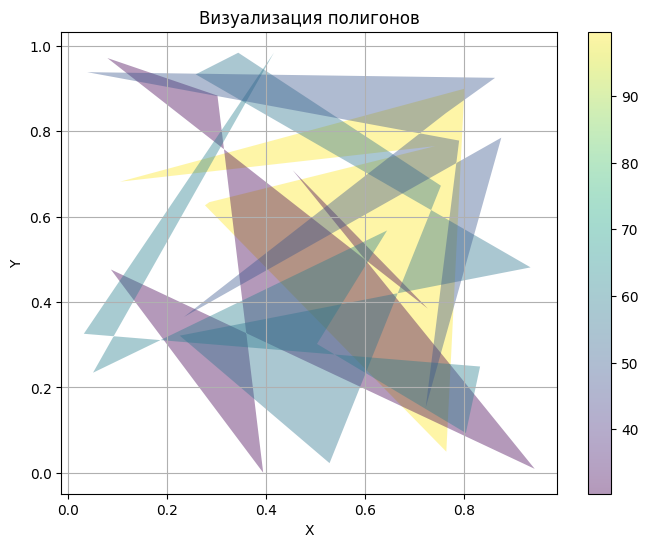

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
from matplotlib.path import Path
from itertools import chain, islice
from functools import wraps, reduce
from math import sqrt, atan2

def visualize_polygons(polygon_iterator, alpha=0.4, color_range=100, figsize=(8, 6)):
    """
    Визуализирует последовательность полигонов из итератора.
    
    Args:
        polygon_iterator: Итератор, возвращающий последовательность полигонов (массивы вершин).
        alpha: Прозрачность заливки полигонов (по умолчанию 0.4).
        color_range: Диапазон значений для цветовой карты (по умолчанию 100).
        figsize: Размер фигуры в дюймах (по умолчанию (8, 6)).

    Returns:
        None. Отображает график с полигонами.
    """
    fig, ax = plt.subplots(figsize=figsize)
    patches = []
    
    for vertices in polygon_iterator:
        if len(vertices) >= 3:
            polygon = Polygon(vertices, closed=True)
            patches.append(polygon)
    
    if not patches:
        print("Нет полигонов для отображения")
        plt.close(fig)
        return
    
    colors = color_range * np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=alpha)
    p.set_array(colors)
    
    ax.add_collection(p)
    fig.colorbar(p, ax=ax)
    
    ax.autoscale_view()
    plt.title("Визуализация полигонов")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    def test_polygon_iterator():
        """
        Генерирует тестовые полигоны со случайными вершинами.
        
        Yields:
            np.ndarray: Массив координат вершин полигона в формате (N, 2).
        """
        for _ in range(5):
            num_vertices = np.random.randint(3, 8)
            yield np.random.rand(num_vertices, 2)
    
    visualize_polygons(test_polygon_iterator())

2.	Реализовать функции, генерирующие бесконечную последовательность непересекающихся полигонов с различающимися координатами (например, «ленту», см. рис. 2):

* прямоугольников (`gen_rectangle`);

* треугольников (`gen_triangle`);

* правильных шестиугольников (`gen_hexagon`).

* с помощью данных функций используя функции из модуля `itertools` сгенерировать семь фигур, включающих как прямоугольники, так и треугольники и шестиугольники, визуализировать результат.

<font color="Crimson">**обязательная часть**


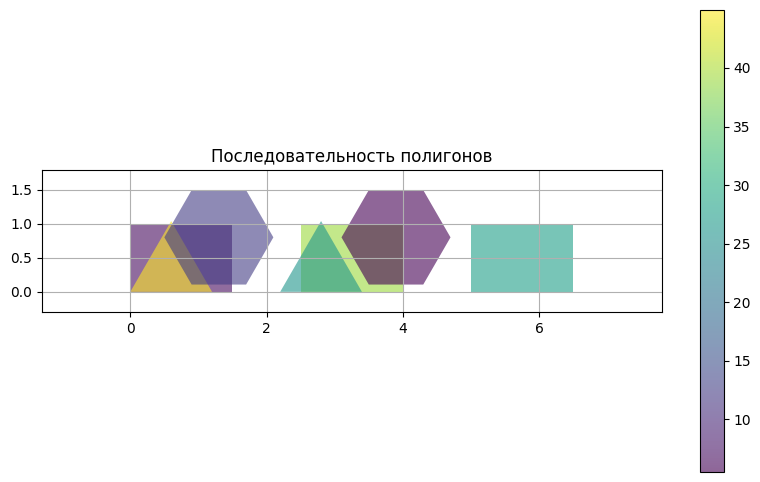

In [2]:
def gen_rectangle(start_x=0, width=1, height=1, spacing=0.5):
    """
    Генератор бесконечной последовательности прямоугольников.

    Args:
        start_x: Начальная координата X первого прямоугольника.
        width: Ширина прямоугольников.
        height: Высота прямоугольников.
        spacing: Расстояние между прямоугольниками.

    Yields:
        np.ndarray: Вершины прямоугольника в виде массива 4x2.
    """
    x = start_x
    while True:
        yield np.array([[x, 0], [x + width, 0], [x + width, height], [x, height]])
        x += width + spacing

def gen_triangle(start_x=0, side=1, spacing=0.5):
    """
    Генератор бесконечной последовательности равносторонних треугольников.

    Args:
        start_x: Начальная координата X первого треугольника.
        side: Длина стороны треугольника.
        spacing: Расстояние между треугольниками.

    Yields:
        np.ndarray: Вершины треугольника в виде массива 3x2.
    """
    x = start_x
    while True:
        height = side * np.sqrt(3) / 2
        yield np.array([[x, 0], [x + side, 0], [x + side/2, height]])
        x += side + spacing

def gen_hexagon(start_x=0, side=1, spacing=0.5):
    """
    Генератор бесконечной последовательности правильных шестиугольников.

    Args:
        start_x: Начальная координата X первого шестиугольника.
        side: Длина стороны шестиугольника.
        spacing: Расстояние между шестиугольниками.

    Yields:
        np.ndarray: Вершины шестиугольника в виде массива 6x2.
    """
    x = start_x
    while True:
        angles = np.linspace(0, 2*np.pi, 7)[:-1]
        center_x = x + side + spacing/2
        center_y = side
        yield np.array([[center_x + side * np.cos(a), center_y + side * np.sin(a)] for a in angles])
        x += 2*side + spacing

def visualize_polygons(polygon_iterator, alpha=0.4, color_range=100, figsize=(10, 6)):
    """
    Визуализирует полигоны с автоматическим масштабированием.

    Args:
        polygon_iterator: Итератор с полигонами для отображения.
        alpha: Прозрачность заливки (0-1).
        color_range: Диапазон цветовых значений.
        figsize: Размер фигуры.
    """
    fig, ax = plt.subplots(figsize=figsize)
    patches = []
    all_vertices = []
    
    for vertices in polygon_iterator:
        if len(vertices) >= 3:
            polygon = Polygon(vertices, closed=True)
            patches.append(polygon)
            all_vertices.extend(vertices)
    
    if not patches:
        print("Нет полигонов для отображения")
        return
    
    all_vertices = np.array(all_vertices)
    min_x, min_y = np.min(all_vertices, axis=0)
    max_x, max_y = np.max(all_vertices, axis=0)
    padding_x = (max_x - min_x) * 0.2
    padding_y = (max_y - min_y) * 0.2
    
    ax.set_xlim(min_x - padding_x, max_x + padding_x)
    ax.set_ylim(min_y - padding_y, max_y + padding_y)
    ax.set_aspect('equal')
    
    colors = color_range * np.random.rand(len(patches))
    p = PatchCollection(patches, alpha=alpha)
    p.set_array(colors)
    ax.add_collection(p)
    fig.colorbar(p, ax=ax)
    plt.title("Последовательность полигонов")
    plt.grid(True)
    plt.show()

combined_shapes = chain(
    islice(gen_rectangle(width=1.5, height=1, spacing=1.0), 3),
    islice(gen_triangle(side=1.2, spacing=1.0), 2),
    islice(gen_hexagon(side=0.8, spacing=1.0), 2)
)

visualize_polygons(combined_shapes, alpha=0.6, color_range=50)

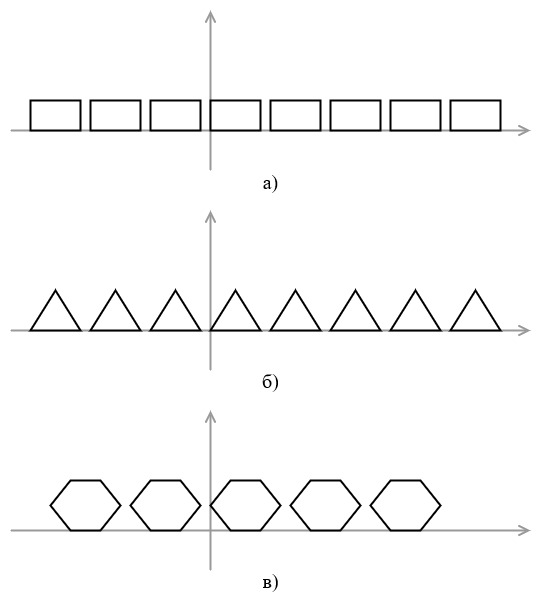

Рисунок 2 — Последовательности непересекающихся полигонов

3.	Реализовать операции:

* параллельный перенос (`tr_translate`);

* поворот (`tr_rotate`);

* симметрия (`tr_symmetry`);

* гомотетия (`tr_homothety`);

которые можно применить к последовательности полигонов с помощью функции `map`.

<font color="Crimson">**обязательная часть**


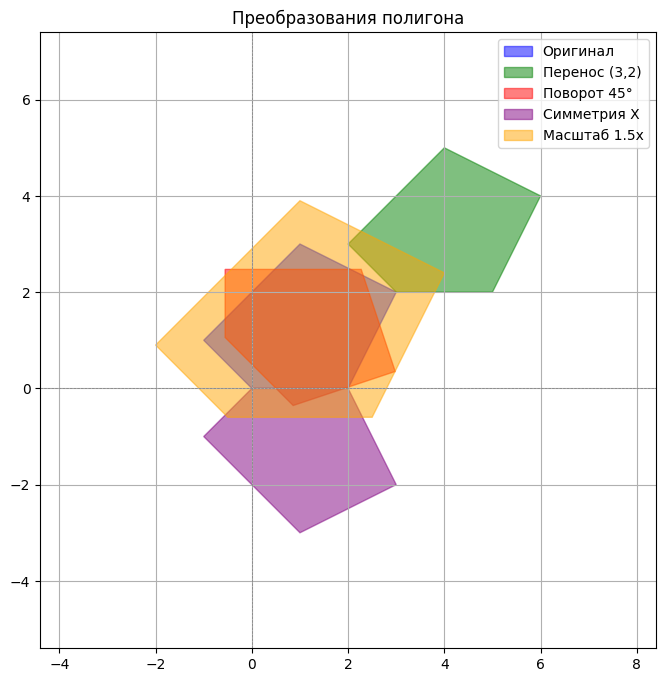

In [3]:
original_shape = np.array([[0, 0], [2, 0], [3, 2], [1, 3], [-1, 1]])

def tr_translate(polygon, dx, dy):
    """
    Выполняет перенос (сдвиг) полигона на заданные величины.

    Args:
        polygon: Исходный полигон (массив точек).
        dx: Смещение по оси X.
        dy: Смещение по оси Y.

    Returns:
        np.ndarray: Новый полигон после переноса.
    """
    return polygon + np.array([dx, dy])

def tr_rotate(polygon, angle_deg, center=None):
    """
    Выполняет поворот полигона на заданный угол.

    Args:
        polygon: Исходный полигон.
        angle_deg: Угол поворота в градусах.
        center: Центр поворота (по умолчанию - центр масс полигона).

    Returns:
        np.ndarray: Новый полигон после поворота.
    """
    angle_rad = np.radians(angle_deg)
    rot_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    center = np.mean(polygon, axis=0) if center is None else center
    return np.dot(polygon - center, rot_matrix) + center

def tr_symmetry(polygon, axis='x'):
    """
    Выполняет симметричное отражение полигона.

    Args:
        polygon: Исходный полигон.
        axis: Ось симметрии ('x' или 'y').

    Returns:
        np.ndarray: Новый полигон после отражения.
    """
    return np.array([[x, -y] if axis == 'x' else [-x, y] for x, y in polygon])

def tr_homothety(polygon, k, center=None):
    """
    Выполняет гомотетию (масштабирование) полигона.

    Args:
        polygon: Исходный полигон.
        k: Коэффициент масштабирования.
        center: Центр масштабирования (по умолчанию - центр масс).

    Returns:
        np.ndarray: Новый полигон после масштабирования.
    """
    center = np.mean(polygon, axis=0) if center is None else center
    return center + k * (polygon - center)

translated = tr_translate(original_shape.copy(), 3, 2)
rotated = tr_rotate(original_shape.copy(), 45)
symmetric = tr_symmetry(original_shape.copy(), 'x')
scaled = tr_homothety(original_shape.copy(), 1.5)

def plot_transformations(original, transformations, titles):
    """
    Визуализирует оригинальный полигон и его преобразования.

    Args:
        original: Исходный полигон.
        transformations: Список преобразованных полигонов.
        titles: Список названий преобразований.
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    
    ax.add_patch(Polygon(original, closed=True, fill=True, alpha=0.5, color=colors[0], label='Оригинал'))
    
    for i, (shape, title) in enumerate(zip(transformations, titles), 1):
        ax.add_patch(Polygon(shape, closed=True, fill=True, alpha=0.5, color=colors[i], label=title))
    
    all_vertices = np.vstack([original] + transformations)
    min_x, min_y = np.min(all_vertices, axis=0)
    max_x, max_y = np.max(all_vertices, axis=0)
    padding = max(max_x - min_x, max_y - min_y) * 0.3
    
    ax.set_xlim(min_x - padding, max_x + padding)
    ax.set_ylim(min_y - padding, max_y + padding)
    ax.set_aspect('equal')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.5)
    ax.grid(True)
    ax.legend()
    plt.title("Преобразования полигона")
    plt.show()

transformations = [translated, rotated, symmetric, scaled]
titles = ["Перенос (3,2)", "Поворот 45°", "Симметрия X", "Масштаб 1.5x"]

plot_transformations(original_shape, transformations, titles)

4.	С помощью данных функций создать и визуализировать (рис. 3):

* три параллельных «ленты» из последовательностей полигонов, расположенных под острым углом к оси абсцисс;

* две пересекающихся «ленты» из последовательностей полигонов, пересекающихся не в начале координат;

* две параллельных ленты треугольников, ориентированных симметрично друг к другу;

* последовательность четырехугольников в разном масштабе, ограниченных двумя прямыми, пересекающимися в начале координат.

<font color="Crimson">**обязательная часть**

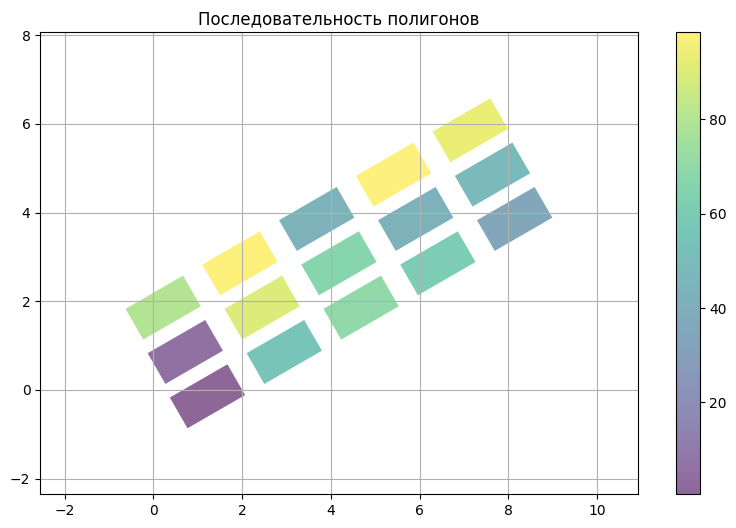

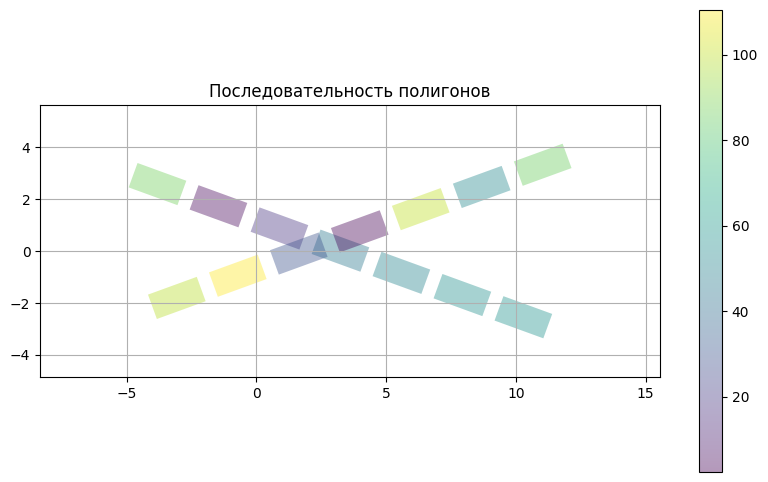

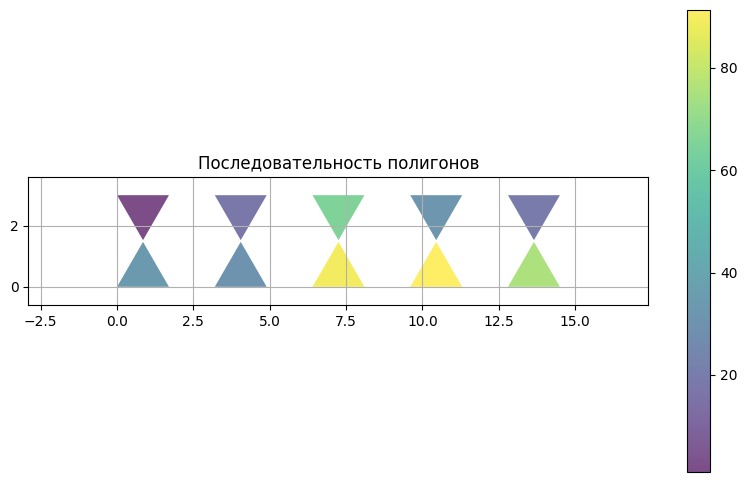

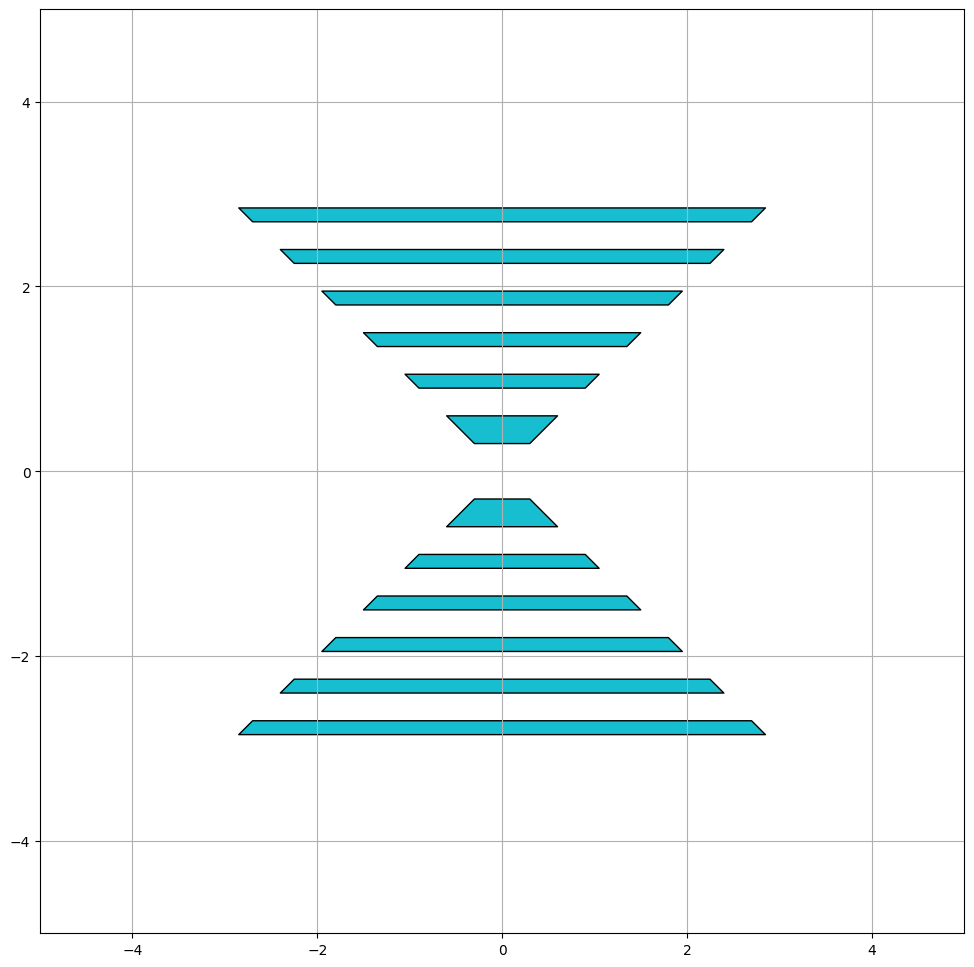

In [4]:
rects = islice(gen_rectangle(width=1.5, height=0.8), 5)
rotated_rects = [tr_rotate(r, angle_deg=-30, center=(2,1)) for r in rects]

ribbon1 = rotated_rects
ribbon2 = [tr_translate(r, -0.5, 1) for r in rotated_rects]
ribbon3 = [tr_translate(r, -1, 2) for r in rotated_rects]

visualize_polygons(chain(ribbon1, ribbon2, ribbon3), alpha=0.6, figsize=(10, 6))

rects = islice(gen_rectangle(start_x=-5, width=2), 7)
ribbon1 = [tr_rotate(r, 20, center=(2,1)) for r in rects]

tris = islice(gen_rectangle(start_x=-5, width=2), 7)
ribbon2 = [tr_rotate(t, -20, center=(3,2)) for t in tris]

visualize_polygons(chain(ribbon1, ribbon2), color_range=150)

tris = list(islice(gen_triangle(side=1.7), 5))
ribbon1 = [tr_translate(t, i, 0) for i, t in enumerate(tris)]

ribbon2 = [tr_translate(tr_symmetry(t, 'x'), i, 3) for i, t in enumerate(tris)]

visualize_polygons(chain(ribbon1, ribbon2), alpha=0.7)

scales = [0.5, 0.7, 1.0, 1.3, 1.6, 2.0]
gap = 0.15
rotation_angle = 0
base_angle = 45

y_vals = np.linspace(0.3, 3.0, len(scales)+1)
quads = []

for i in range(len(y_vals)-1):
    y_top = y_vals[i] + (gap if i > 0 else 0)
    y_bottom = y_vals[i+1] - gap
    
    scale = scales[i]
    half_width_top = y_top / np.tan(np.radians(base_angle))
    half_width_bottom = y_bottom / np.tan(np.radians(base_angle))
    
    quad = np.array([
        [-half_width_top, y_top],
        [half_width_top, y_top],
        [half_width_bottom, y_bottom],
        [-half_width_bottom, y_bottom]
    ])
    quads.append(quad)
    
    mirror_xy = np.array([[-x, -y] for x, y in quad])
    quads.append(mirror_xy)

rotated_quads = [tr_rotate(quad, angle_deg=rotation_angle) for quad in quads]

plt.figure(figsize=(12,12))
ax = plt.gca()

patches = [Polygon(p, closed=True, alpha=0.6) for p in rotated_quads]
pc = PatchCollection(patches, facecolor='#17becf', edgecolor='black')
ax.add_collection(pc)

ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_aspect('equal')
plt.title(f"", pad=15)
plt.grid(True)
plt.show()

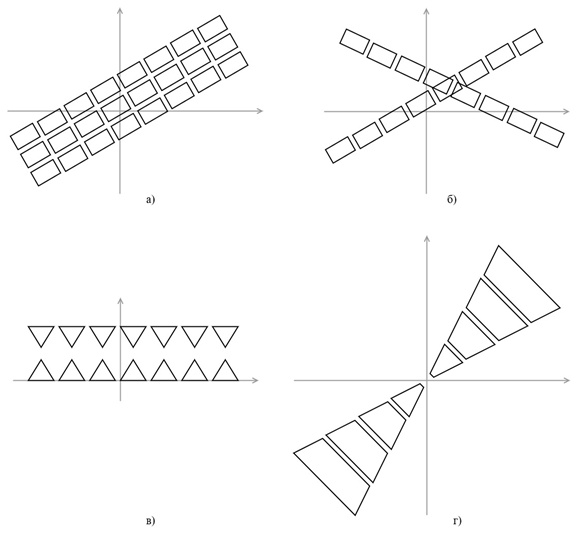

Рисунок 3 — Реализация операции параллельного переноса (а), поворота (б),
симметрии (в) и гомотетии (г)

5.	Реализовать операции:

* фильтрации фигур, являющихся выпуклыми многоугольниками (`flt_convex_polygon`);

* фильтрации фигур, имеющих хотя бы один угол, совпадающий с заданной точкой (`flt_angle_point`);

* фильтрации фигур, имеющих площадь меньше заданной (`flt_square`);

* фильтрации фигур, имеющих кратчайшую сторону меньше заданного значения (`flt_short_side`);

* фильтрации выпуклых многоугольников, включающих заданную точку (внутри многоугольника) (`flt_point_inside`);

* фильтрации выпуклых многоугольников, включающих любой из углов заданного многоугольника (`flt_polygon_angles_inside`);

которые можно применить к последовательности полигонов с помощью функции `filter`.

<font color="Crimson">**обязательная часть: 2 пункта<br>4 пункта — сложность 1<br>6 пунктов — сложность 2**


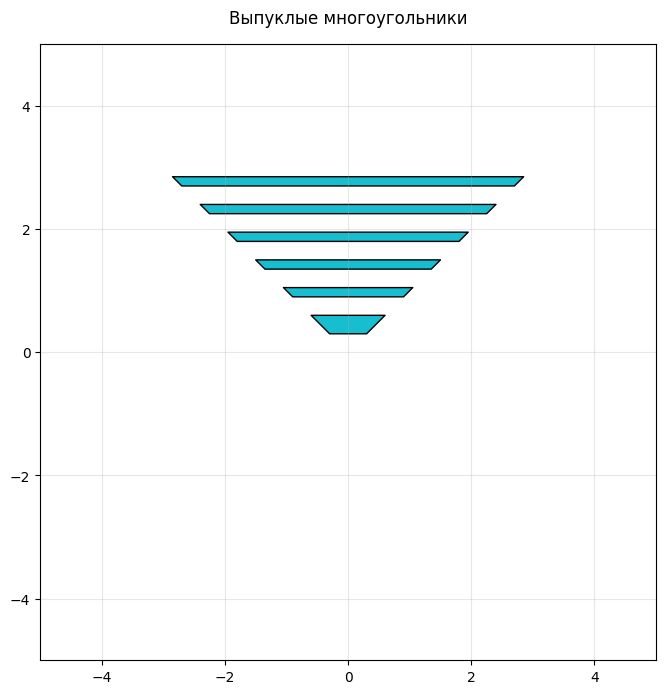

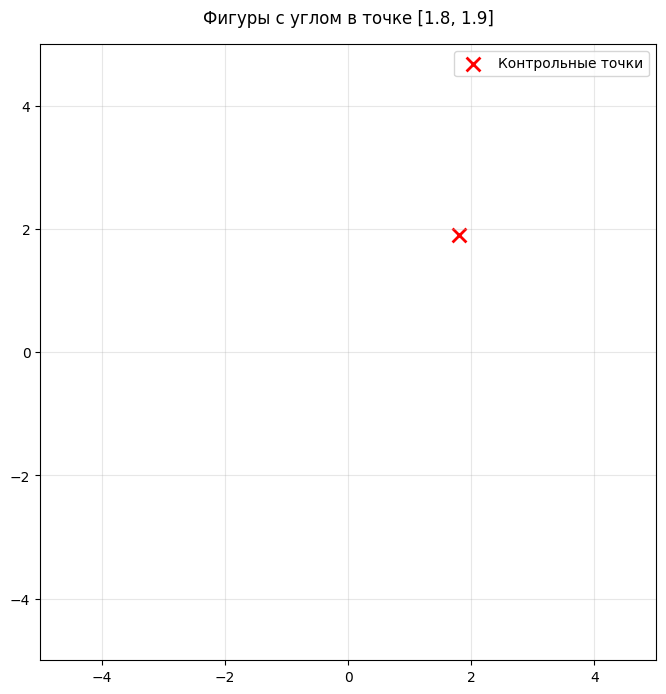

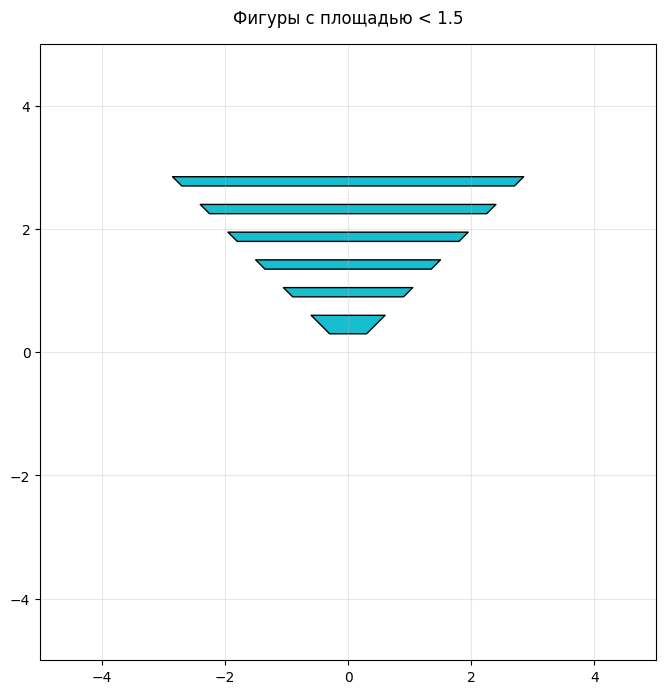

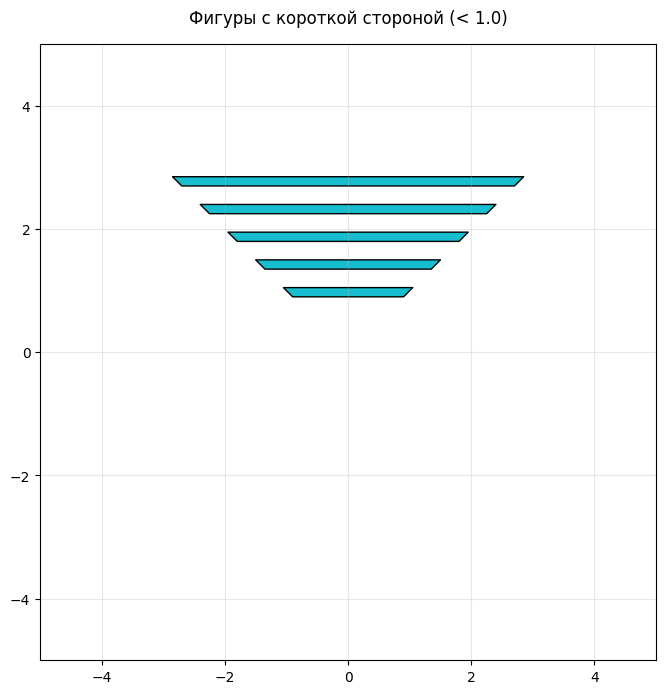

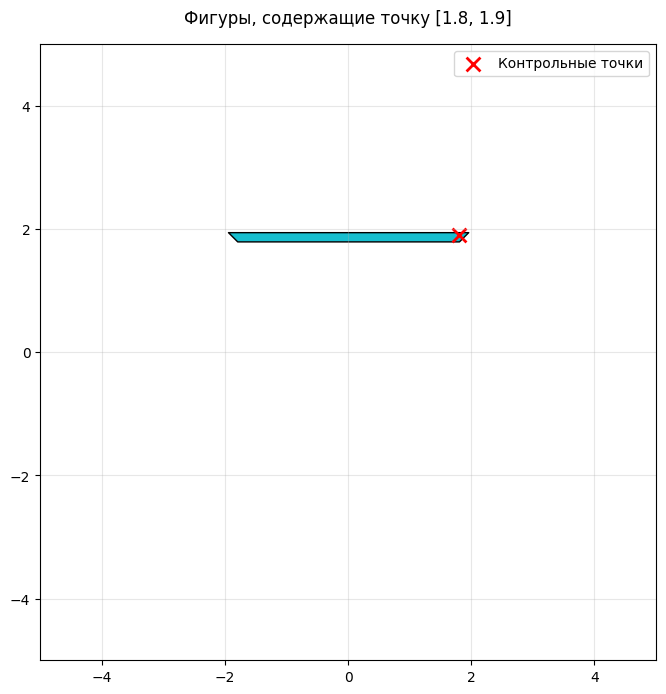

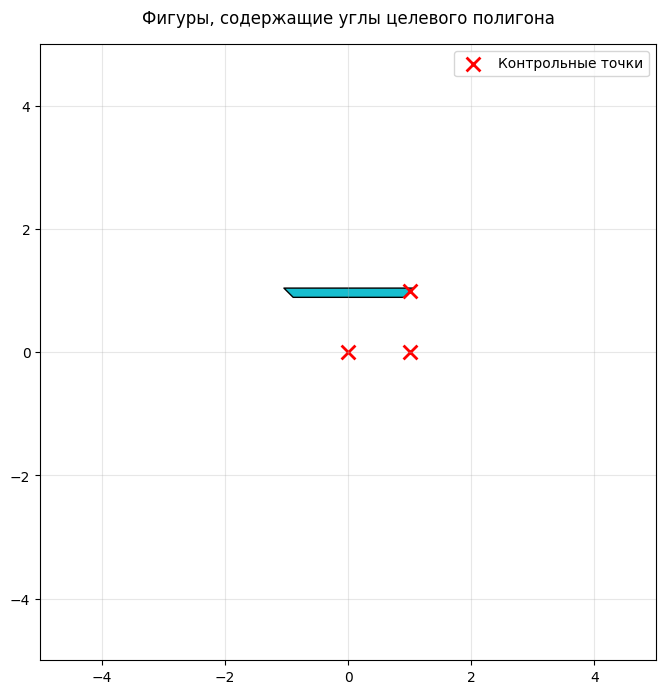

In [5]:
def flt_convex_polygon(polygon_iterator):
    """
    Фильтр выпуклых многоугольников.

    Args:
        polygon_iterator: Итератор многоугольников.

    Yields:
        Только выпуклые многоугольники.
    """
    def is_convex(poly):
        if len(poly) < 3: return False
        cross_prods = []
        n = len(poly)
        for i in range(n):
            a = poly[i]
            b = poly[(i+1)%n]
            c = poly[(i+2)%n]
            cross = (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
            cross_prods.append(cross)
        return all(c >= 0 for c in cross_prods) or all(c <= 0 for c in cross_prods)
    return filter(is_convex, polygon_iterator)

def flt_angle_point(polygon_iterator, point):
    """
    Фильтр фигур с углом в заданной точке.

    Args:
        polygon_iterator: Итератор многоугольников.
        point: Точка для проверки.

    Yields:
        Многоугольники, содержащие заданную точку в вершинах.
    """
    return filter(lambda p: any(np.allclose(vertex, point) for vertex in p), polygon_iterator)

def flt_square(polygon_iterator, max_area):
    """
    Фильтр по максимальной площади.

    Args:
        polygon_iterator: Итератор многоугольников.
        max_area: Максимальная допустимая площадь.

    Yields:
        Многоугольники с площадью меньше max_area.
    """
    return filter(lambda p: calculate_area(p) < max_area, polygon_iterator)

def flt_short_side(polygon_iterator, min_length):
    """
    Фильтр по минимальной длине стороны.

    Args:
        polygon_iterator: Итератор многоугольников.
        min_length: Минимальная длина стороны.

    Yields:
        Многоугольники с хотя бы одной стороной короче min_length.
    """
    def shortest_side(poly):
        if len(poly) < 2: return 0
        min_side = float('inf')
        n = len(poly)
        for i in range(n):
            a = poly[i]
            b = poly[(i+1)%n]
            side_len = np.linalg.norm(a - b)
            if side_len < min_side:
                min_side = side_len
        return min_side
    return filter(lambda p: shortest_side(p) < min_length, polygon_iterator)

def flt_point_inside(polygon_iterator, point):
    """
    Фильтр выпуклых многоугольников, содержащих точку.

    Args:
        polygon_iterator: Итератор многоугольников.
        point: Точка для проверки.

    Yields:
        Выпуклые многоугольники, содержащие точку.
    """
    def contains_point(poly):
        path = Path(poly)
        return path.contains_point(point)
    convex_polys = flt_convex_polygon(polygon_iterator)
    return filter(contains_point, convex_polys)

def flt_polygon_angles_inside(polygon_iterator, target_poly):
    """
    Фильтр многоугольников, содержащих углы целевого многоугольника.

    Args:
        polygon_iterator: Итератор многоугольников.
        target_poly: Целевой многоугольник.

    Yields:
        Выпуклые многоугольники, содержащие хотя бы одну вершину целевого.
    """
    def any_angle_inside(poly):
        path = Path(poly)
        return any(path.contains_point(vertex) for vertex in target_poly)
    convex_polys = flt_convex_polygon(polygon_iterator)
    return filter(any_angle_inside, convex_polys)

def calculate_area(polygon):
    """
    Вычисление площади многоугольника по формуле шнурования.

    Args:
        polygon: Многоугольник (массив вершин).

    Returns:
        float: Площадь многоугольника.
    """
    x = polygon[:, 0]
    y = polygon[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def visualize_filtered(filtered_shapes, title, highlight_points=None):
    """
    Визуализация отфильтрованных полигонов с возможностью выделения точек.

    Args:
        filtered_shapes: Список отфильтрованных полигонов.
        title: Заголовок графика.
        highlight_points: Точки для выделения (опционально).
    """
    fig, ax = plt.subplots(figsize=(10, 8))
    
    patches = [Polygon(p, closed=True, alpha=0.5) for p in filtered_shapes]
    pc = PatchCollection(patches, facecolor='#17becf', edgecolor='black')
    ax.add_collection(pc)
    
    if highlight_points is not None:
        points = np.array(highlight_points)
        ax.scatter(points[:,0], points[:,1], c='red', s=100, marker='x', 
                 linewidths=2, label='Контрольные точки')
        ax.legend()
    
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    plt.title(title, pad=15)
    plt.show()

if __name__ == "__main__":
    scales = [0.5, 0.7, 1.0, 1.3, 1.6, 2.0]
    gap = 0.15
    y_vals = np.linspace(0.3, 3.0, len(scales)+1)
    test_shapes = []
    
    for i in range(len(y_vals)-1):
        y_top = y_vals[i] + (gap if i > 0 else 0)
        y_bottom = y_vals[i+1] - gap
        half_width_top = y_top / np.tan(np.radians(45))
        half_width_bottom = y_bottom / np.tan(np.radians(45))
        
        quad = np.array([
            [-half_width_top, y_top],
            [half_width_top, y_top],
            [half_width_bottom, y_bottom],
            [-half_width_bottom, y_bottom]
        ])
        test_shapes.append(quad)
    
    test_point = [1.8, 1.9]
    target_polygon = np.array([[0, 0], [1, 1], [1, 0]])
    
    convex_shapes = list(flt_convex_polygon(test_shapes))
    visualize_filtered(convex_shapes, "Выпуклые многоугольники")
    
    angle_shapes = list(flt_angle_point(test_shapes, test_point))
    visualize_filtered(angle_shapes, f"Фигуры с углом в точке {test_point}", [test_point])
    
    area_shapes = list(flt_square(test_shapes, 1.5))
    visualize_filtered(area_shapes, "Фигуры с площадью < 1.5")
    
    side_shapes = list(flt_short_side(test_shapes, 0.35))
    visualize_filtered(side_shapes, "Фигуры с короткой стороной (< 1.0)")
    
    inside_shapes = list(flt_point_inside(test_shapes, test_point))
    visualize_filtered(inside_shapes, f"Фигуры, содержащие точку {test_point}", [test_point])
    
    angles_inside = list(flt_polygon_angles_inside(test_shapes, target_polygon))
    visualize_filtered(angles_inside, "Фигуры, содержащие углы целевого полигона", target_polygon)

6.	С помощью данных функций реализовать и визуализировать:

* фильтрацию фигур, созданных в рамках пункта 4.4; подобрать параметры так, чтобы на выходе было получено шесть фигур;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур, которые имеют различный масштаб, и выбрать из них (подбором параметра фильтрации) не более четырех фигур, имеющих кратчайшую сторону меньше заданного значения;

* используя функции генерации из п. 2 и операции из п. 3, создать не менее 15 фигур имеющих множество пересечений и обеспечить фильтрацию пересекающихся фигур.

<font color="Crimson">**обязательная часть: 1 пункт<br>3 пункта — сложность 1**

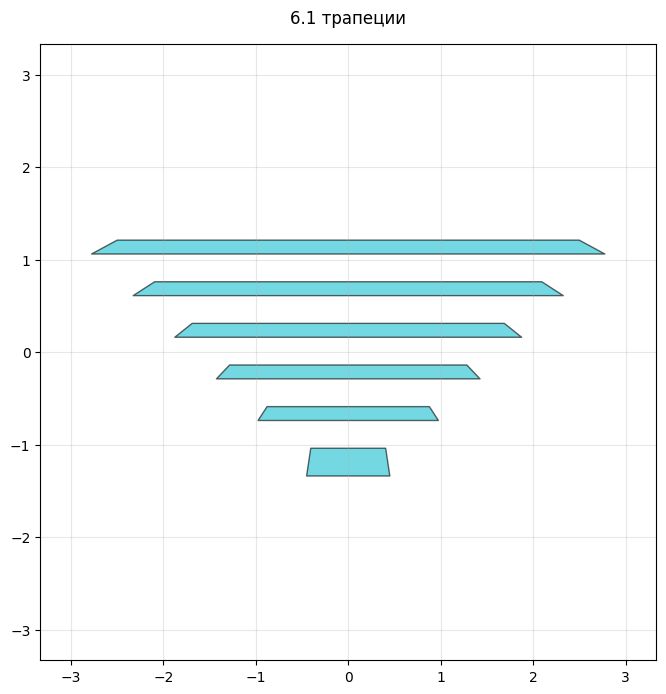

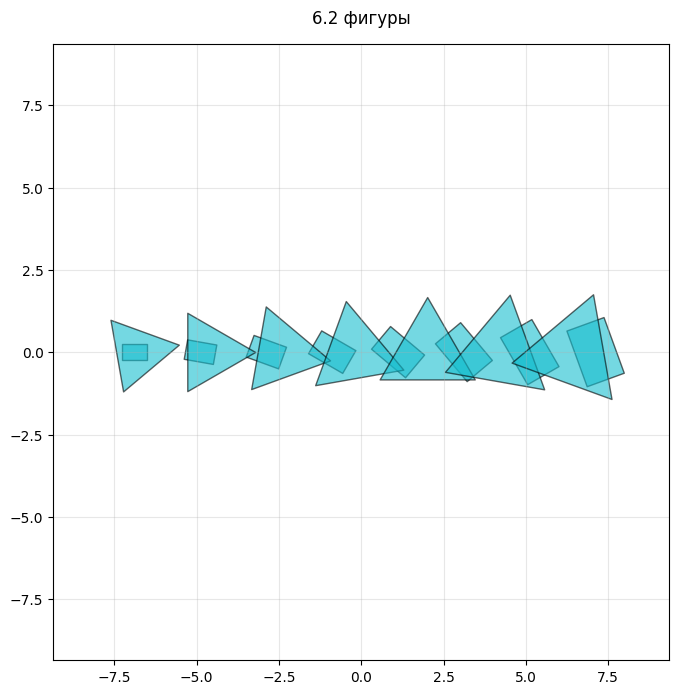

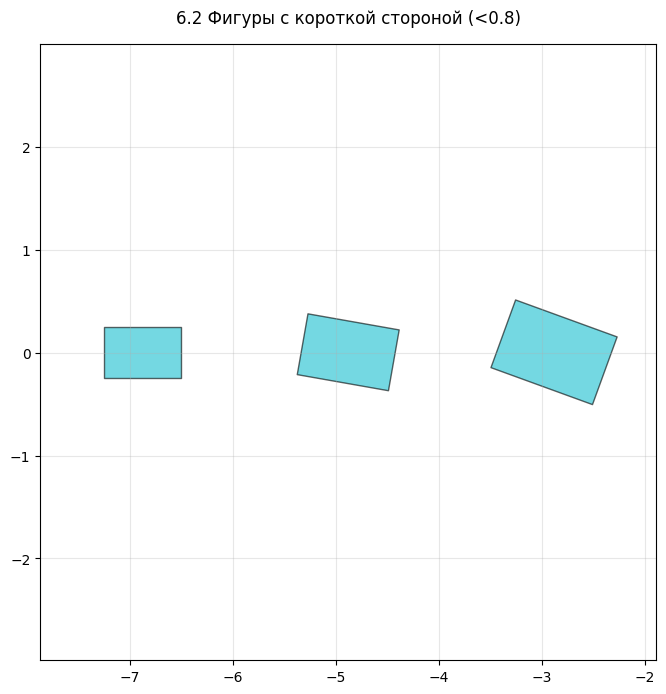

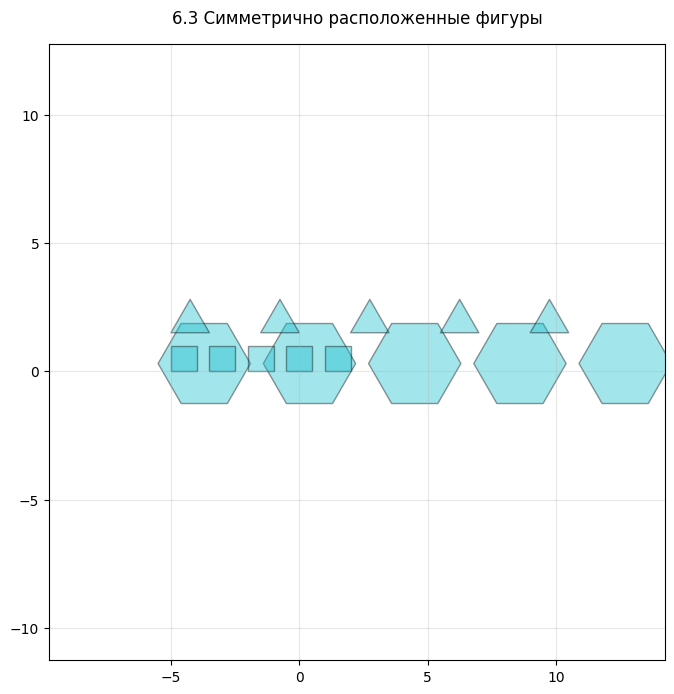

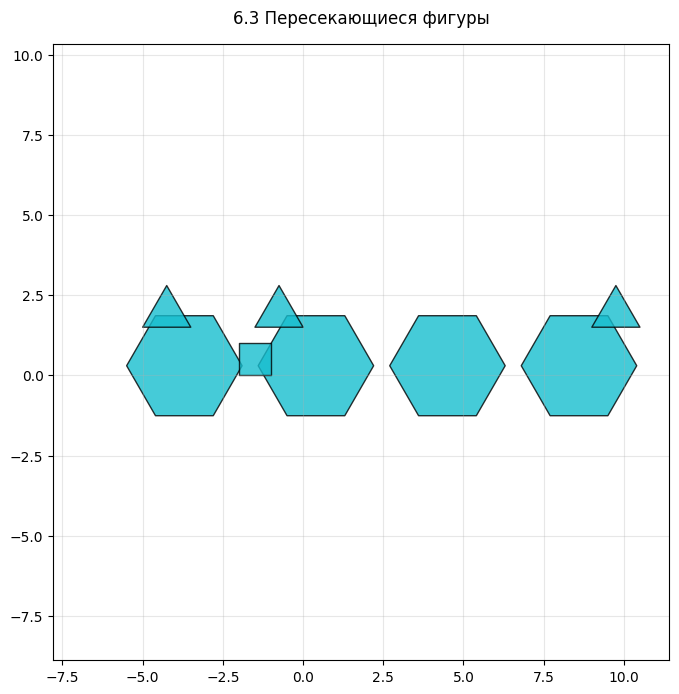

In [7]:
def visualize_shapes(shapes, title="", highlight_points=None, figsize=(10, 8), alpha=0.6):
    """
    Визуализация фигур с автоматическим центрированием.

    Args:
        shapes: Список фигур для отображения.
        title: Заголовок графика.
        highlight_points: Точки для выделения.
        figsize: Размер фигуры.
        alpha: Прозрачность фигур.
    """
    fig, ax = plt.subplots(figsize=figsize)
    
    if shapes:
        patches = [Polygon(p, closed=True) for p in shapes if len(p) >= 3]
        pc = PatchCollection(patches, alpha=alpha, edgecolor='black', facecolor='#17becf')
        ax.add_collection(pc)
        
        if highlight_points:
            points = np.array(highlight_points)
            ax.scatter(points[:,0], points[:,1], c='red', s=100, marker='x', 
                      linewidths=2, label='Контрольные точки')
            ax.legend()
    
    all_points = np.vstack(shapes) if shapes else np.array([[0,0]])
    x_center, y_center = np.mean(all_points, axis=0)
    max_extent = max(np.ptp(all_points[:,0]), np.ptp(all_points[:,1])) * 0.6
    
    ax.set_xlim(x_center - max_extent, x_center + max_extent)
    ax.set_ylim(y_center - max_extent, y_center + max_extent)
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    plt.title(title, pad=15)
    plt.show()

def task_6_1():
    """Демонстрация центрированных трапеций."""
    scales = [0.5, 0.7, 1.0, 1.3, 1.6, 2.0]
    gap = 0.15
    y_vals = np.linspace(0.3, 3.0, len(scales)+1)
    shapes = []
    
    for i in range(len(y_vals)-1):
        y_top = y_vals[i] + (gap if i > 0 else 0)
        y_bottom = y_vals[i+1] - gap
        half_width = (y_top + y_bottom)/2 / np.tan(np.radians(45))
        
        quad = np.array([
            [-half_width, y_top],
            [half_width, y_top],
            [half_width*0.9, y_bottom],
            [-half_width*0.9, y_bottom]
        ])
        shapes.append(quad)
    
    center = -np.mean(np.vstack(shapes), axis=0)
    centered_shapes = [tr_translate(s, *center) for s in shapes]
    
    visualize_shapes(centered_shapes, "6.1 трапеции")

def task_6_2():
    """Демонстрация центрированных фигур с фильтрацией по стороне."""
    rects = list(islice(gen_rectangle(width=1.5, height=1.0, start_x=-4), 8))
    tris = list(islice(gen_triangle(side=1.7, start_x=-4), 7))
    
    transformed = []
    for i, shape in enumerate(chain(rects, tris)):
        scaled = tr_homothety(shape, 0.5 + i*0.1)
        rotated = tr_rotate(scaled, i*10, center=np.mean(shape, axis=0))
        transformed.append(rotated)
    
    center = -np.mean(np.vstack(transformed), axis=0)
    centered = [tr_translate(s, *center) for s in transformed]
    
    visualize_shapes(centered, "6.2 фигуры")
    filtered = list(flt_short_side(centered, 0.8))
    visualize_shapes(filtered[:4], "6.2 Фигуры с короткой стороной (<0.8)")

def task_6_3():
    """Демонстрация симметрично расположенных и пересекающихся фигур."""
    hexagons = list(islice(gen_hexagon(side=1.8, start_x=-2, spacing=-1.0), 5))
    rects = list(islice(gen_rectangle(width=1.0, start_x=-2, spacing=-1.0), 5))
    tris = list(islice(gen_triangle(side=1.5, start_x=-2), 5))
    
    shapes = []
    for i, shape in enumerate(chain(hexagons, rects, tris)):
        x_offset = (i % 5 - 2) * 1.5
        y_offset = (i // 5 - 1) * 1.5
        translated = tr_translate(shape, x_offset, y_offset)
        shapes.append(translated)
    
    visualize_shapes(shapes, "6.3 Симметрично расположенные фигуры", alpha=0.4)
    
    intersecting = []
    for i, poly1 in enumerate(shapes):
        path1 = Path(poly1)
        for j, poly2 in enumerate(shapes):
            if i != j and any(path1.contains_point(v) for v in poly2):
                intersecting.append(poly1)
                break
    
    visualize_shapes(intersecting, "6.3 Пересекающиеся фигуры", alpha=0.8)

if __name__ == "__main__":
    task_6_1()
    task_6_2()
    task_6_3()

7.	Реализовать декораторы и продемонстрировать корректность их работы:

* фильтрующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 5: `@flt_convex_polygon`, `@flt_angle_point`, `@flt_square`, `@flt_short_side`, `@flt_point_inside`, `@flt_polygon_angles_inside`;

* преобразующие многоугольники в итераторах среди аргументов функции, работающие на основе функций из п. 3: `@tr_translate`, `@tr_rotate`, `@tr_symmetry`, `@tr_homothety`.

<font color="Crimson">**обязательная часть: 1 пункт<br>5 пунктов — сложность 1**

In [8]:
def is_convex(polygon):
    """
    Проверяет, является ли многоугольник выпуклым.

    Args:
        polygon: Массив вершин многоугольника.

    Returns:
        bool: True если многоугольник выпуклый, иначе False.
    """
    if len(polygon) < 3: return False
    cross_prods = []
    n = len(polygon)
    for i in range(n):
        a, b, c = polygon[i], polygon[(i+1)%n], polygon[(i+2)%n]
        cross = (b[0]-a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])
        cross_prods.append(cross)
    return all(c >= 0 for c in cross_prods) or all(c <= 0 for c in cross_prods)

def calculate_area(polygon):
    """
    Вычисляет площадь многоугольника по формуле шнурования.

    Args:
        polygon: Массив вершин многоугольника.

    Returns:
        float: Площадь многоугольника.
    """
    x, y = polygon[:,0], polygon[:,1]
    return 0.5 * np.abs(np.dot(x, np.roll(y,1)) - np.dot(y, np.roll(x,1)))

def shortest_side(polygon):
    """
    Находит длину кратчайшей стороны многоугольника.

    Args:
        polygon: Массив вершин многоугольника.

    Returns:
        float: Длина кратчайшей стороны.
    """
    if len(polygon) < 2: return 0
    min_len = float('inf')
    n = len(polygon)
    for i in range(n):
        a, b = polygon[i], polygon[(i+1)%n]
        min_len = min(min_len, np.linalg.norm(a - b))
    return min_len

def rotate_polygon(polygon, angle_deg, center=None):
    """
    Поворачивает многоугольник на заданный угол.

    Args:
        polygon: Массив вершин многоугольника.
        angle_deg: Угол поворота в градусах.
        center: Центр поворота (по умолчанию - центр масс).

    Returns:
        np.ndarray: Повернутый многоугольник.
    """
    if center is None:
        center = np.mean(polygon, axis=0)
    angle_rad = np.radians(angle_deg)
    rot_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad)],
        [np.sin(angle_rad), np.cos(angle_rad)]
    ])
    return np.dot(polygon - center, rot_matrix) + center

def flt_convex_polygon(func):
    """
    Декоратор для фильтрации выпуклых многоугольников.

    Args:
        func: Функция-генератор многоугольников.

    Returns:
        Функция-обертка, фильтрующая выпуклые многоугольники.
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        iterator = func(*args, **kwargs)
        return filter(lambda p: is_convex(p), iterator)
    return wrapper

def flt_angle_point(point):
    """
    Декоратор для фильтрации по угловой точке.

    Args:
        point: Точка для проверки.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            return filter(lambda p: any(np.allclose(vertex, point) for vertex in p), iterator)
        return wrapper
    return decorator

def flt_square(max_area):
    """
    Декоратор для фильтрации по максимальной площади.

    Args:
        max_area: Максимальная допустимая площадь.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            return filter(lambda p: calculate_area(p) < max_area, iterator)
        return wrapper
    return decorator

def flt_short_side(min_length):
    """
    Декоратор для фильтрации по минимальной длине стороны.

    Args:
        min_length: Минимальная допустимая длина стороны.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            return filter(lambda p: shortest_side(p) < min_length, iterator)
        return wrapper
    return decorator

def flt_point_inside(point):
    """
    Декоратор для фильтрации по внутренней точке.

    Args:
        point: Точка для проверки.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            convex = filter(lambda p: is_convex(p), iterator)
            return filter(lambda p: Path(p).contains_point(point), convex)
        return wrapper
    return decorator

def flt_polygon_angles_inside(target_poly):
    """
    Декоратор для фильтрации по углам полигона.

    Args:
        target_poly: Целевой полигон.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            convex = filter(lambda p: is_convex(p), iterator)
            return filter(lambda p: any(Path(p).contains_point(v) for v in target_poly), convex)
        return wrapper
    return decorator

def tr_translate(dx, dy):
    """
    Декоратор для параллельного переноса.

    Args:
        dx: Смещение по оси X.
        dy: Смещение по оси Y.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            return map(lambda p: p + np.array([dx, dy]), iterator)
        return wrapper
    return decorator

def tr_rotate(angle_deg, center=None):
    """
    Декоратор для поворота.

    Args:
        angle_deg: Угол поворота в градусах.
        center: Центр поворота.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            return map(lambda p: rotate_polygon(p, angle_deg, center), iterator)
        return wrapper
    return decorator

def tr_symmetry(axis='x'):
    """
    Декоратор для симметрии.

    Args:
        axis: Ось симметрии ('x' или 'y').

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            iterator = func(*args, **kwargs)
            if axis == 'x':
                return map(lambda p: np.array([[x, -y] for x, y in p]), iterator)
            else:
                return map(lambda p: np.array([[-x, y] for x, y in p]), iterator)
        return wrapper
    return decorator

def tr_homothety(k, center=None):
    """
    Декоратор для гомотетии (масштабирования).

    Args:
        k: Коэффициент масштабирования.
        center: Центр масштабирования.

    Returns:
        Декоратор для функции-генератора.
    """
    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            polygons = list(func(*args, **kwargs))
            if center is None and len(polygons) > 0:
                current_center = np.mean(polygons[0], axis=0)
            else:
                current_center = center if center is not None else np.array([0, 0])
            return map(lambda p: current_center + k * (p - current_center), polygons)
        return wrapper
    return decorator

if __name__ == "__main__":
    def generate_test_shapes():
        shapes = [
            np.array([[0,0], [2,0], [2,1], [0,1]]),
            np.array([[3,0], [4,0], [3.5,1]]),
            np.array([[5+np.cos(a), np.sin(a)] for a in np.linspace(0, 2*np.pi, 7)[:-1]])
        ]
        return shapes
    
    @flt_convex_polygon
    @flt_square(3.0)
    def get_filtered_shapes():
        return generate_test_shapes()
    
    print("Фильтрация выпуклых с площадью < 3.0:")
    for shape in get_filtered_shapes():
        print(shape)
    
    @tr_rotate(45)
    @tr_translate(1, 1)
    def get_transformed_shapes():
        return generate_test_shapes()
    
    print("\nПовернутые на 45° и смещенные фигуры:")
    for shape in get_transformed_shapes():
        print(shape)
    
    @flt_point_inside([3.5, 0.5])
    @tr_homothety(1.5)
    def get_complex_example():
        return generate_test_shapes()
    
    print("\nУвеличенные фигуры, содержащие точку (3.5, 0.5):")
    for shape in get_complex_example():
        print(shape)

Фильтрация выпуклых с площадью < 3.0:
[[0 0]
 [2 0]
 [2 1]
 [0 1]]
[[3.  0. ]
 [4.  0. ]
 [3.5 1. ]]
[[ 6.00000000e+00  0.00000000e+00]
 [ 5.50000000e+00  8.66025404e-01]
 [ 4.50000000e+00  8.66025404e-01]
 [ 4.00000000e+00  1.22464680e-16]
 [ 4.50000000e+00 -8.66025404e-01]
 [ 5.50000000e+00 -8.66025404e-01]]

Повернутые на 45° и смещенные фигуры:
[[0.93933983 1.85355339]
 [2.35355339 0.43933983]
 [3.06066017 1.14644661]
 [1.64644661 2.56066017]]
[[3.91074435 1.45118446]
 [4.61785113 0.74407768]
 [4.97140452 1.80473785]]
[[6.70710678 0.29289322]
 [6.96592583 1.25881905]
 [6.25881905 1.96592583]
 [5.29289322 1.70710678]
 [5.03407417 0.74118095]
 [5.74118095 0.03407417]]

Увеличенные фигуры, содержащие точку (3.5, 0.5):


8. Реализовать функции и продемонстрировать их корректность:

* поиск угла, самого близкого к началу координат (`agr_origin_nearest`);

* поиск самого длинной стороны многоугольника (`agr_max_side`);

* поиск самой маленькой площади многоугольника (`agr_min_area`);

* расчет суммарного периметра (`agr_perimeter`);

* расчет суммарной площади (`agr_area`);

которые можно применить к последовательности полигонов с помощью функции `functools.reduce`.

<font color="Crimson">**3 пункта — сложность 1<br>5 пунктов — сложность 2**


In [9]:
def calculate_distance(point):
    """
    Вычисляет евклидово расстояние от точки до начала координат.

    Args:
        point: Точка в виде массива [x, y].

    Returns:
        float: Расстояние до начала координат.
    """
    return sqrt(point[0]**2 + point[1]**2)

def calculate_side_lengths(polygon):
    """
    Вычисляет длины всех сторон полигона.

    Args:
        polygon: Массив вершин полигона.

    Returns:
        list: Список длин сторон.
    """
    return [np.linalg.norm(polygon[i] - polygon[(i+1)%len(polygon)]) 
            for i in range(len(polygon))]

def calculate_perimeter(polygon):
    """
    Вычисляет периметр полигона.

    Args:
        polygon: Массив вершин полигона.

    Returns:
        float: Периметр полигона.
    """
    return sum(calculate_side_lengths(polygon))

def calculate_area(polygon):
    """
    Вычисляет площадь полигона по формуле шнурования.

    Args:
        polygon: Массив вершин полигона.

    Returns:
        float: Площадь полигона.
    """
    x = polygon[:, 0]
    y = polygon[:, 1]
    return 0.5 * np.abs(np.dot(x, np.roll(y, 1)) - np.dot(y, np.roll(x, 1)))

def agr_origin_nearest(current_nearest, polygon):
    """
    Находит полигон с вершиной, ближайшей к началу координат.

    Args:
        current_nearest: Текущий ближайший полигон.
        polygon: Новый полигон для сравнения.

    Returns:
        np.ndarray: Полигон с ближайшей вершиной.
    """
    closest_in_poly = min(polygon, key=lambda p: calculate_distance(p))
    if isinstance(current_nearest, np.ndarray):
        current_dist = min(calculate_distance(p) for p in current_nearest)
        new_dist = calculate_distance(closest_in_poly)
        return polygon if new_dist < current_dist else current_nearest
    return polygon

def agr_max_side(current_max, polygon):
    """
    Находит полигон с самой длинной стороной.

    Args:
        current_max: Текущий полигон с максимальной стороной.
        polygon: Новый полигон для сравнения.

    Returns:
        np.ndarray: Полигон с самой длинной стороной.
    """
    current_max_side = max(calculate_side_lengths(current_max)) if isinstance(current_max, np.ndarray) else 0
    new_max_side = max(calculate_side_lengths(polygon))
    return polygon if new_max_side > current_max_side else current_max

def agr_min_area(current_min, polygon):
    """
    Находит полигон с минимальной площадью.

    Args:
        current_min: Текущий полигон с минимальной площадью.
        polygon: Новый полигон для сравнения.

    Returns:
        np.ndarray: Полигон с минимальной площадью.
    """
    current_area = calculate_area(current_min) if isinstance(current_min, np.ndarray) else float('inf')
    new_area = calculate_area(polygon)
    return polygon if new_area < current_area else current_min

def agr_perimeter(total, polygon):
    """
    Суммирует периметры полигонов.

    Args:
        total: Текущая сумма периметров.
        polygon: Новый полигон.

    Returns:
        float: Новая сумма периметров.
    """
    return total + calculate_perimeter(polygon)

def agr_area(total, polygon):
    """
    Суммирует площади полигонов.

    Args:
        total: Текущая сумма площадей.
        polygon: Новый полигон.

    Returns:
        float: Новая сумма площадей.
    """
    return total + calculate_area(polygon)

if __name__ == "__main__":
    polygons = [
        np.array([[0, 0], [1, 0], [1, 1], [0, 1]]),
        np.array([[0, 0], [2, 0], [2, 1]]),
        np.array([[3, 0], [4, 0], [4, 2], [3, 2]]),
        np.array([[-1, -1], [0, 1], [1, -1]])
    ]
    
    print("Полигон с углом, ближайшим к началу координат:")
    print(reduce(agr_origin_nearest, polygons))
    
    print("\nПолигон с самой длинной стороной:")
    print(reduce(agr_max_side, polygons))
    
    print("\nПолигон с самой маленькой площадью:")
    print(reduce(agr_min_area, polygons))
    
    print("\nСуммарный периметр всех полигонов:")
    print(reduce(agr_perimeter, polygons, 0))
    
    print("\nСуммарная площадь всех полигонов:")
    print(reduce(agr_area, polygons, 0))

Полигон с углом, ближайшим к началу координат:
[[0 0]
 [1 0]
 [1 1]
 [0 1]]

Полигон с самой длинной стороной:
[[0 0]
 [2 0]
 [2 1]]

Полигон с самой маленькой площадью:
[[0 0]
 [1 0]
 [1 1]
 [0 1]]

Суммарный периметр всех полигонов:
21.70820393249937

Суммарная площадь всех полигонов:
6.0
